In [121]:
from binance.client import Client
import pandas as pd
import matplotlib.pyplot as plt
import date_to_unix as date
import datetime
import itertools

In [183]:
data2 = pd.read_csv('/Users/nikopindao/Desktop/Master /MA2/Blockchain /Project/Carry_Trade/data/Bitcoin 2019-09-10')
data2['Open Time'] = pd.to_datetime(data2['Open Time'])  # Convert before setting as index
data2.set_index('Open Time', inplace=True, drop=True)
data2

,Open BTCUSDT_SPOT,Open BTCUSDT_PERP,fundingRate,markPrice,cumulative funding rate
Open Time,,,,,
2019-09-10 08:00:00,10272.64,10271.93,0.000100,NaN,0.000100
2019-09-10 16:00:00,10176.26,10172.13,0.000100,NaN,0.000200
2019-09-11 00:00:00,10098.19,10094.27,0.000100,NaN,0.000300
2019-09-11 08:00:00,10066.38,10068.41,0.000100,NaN,0.000400
2019-09-11 16:00:00,9990.57,9992.18,0.000100,NaN,0.000500
...,...,...,...,...,...
2024-05-14 00:00:00,62940.09,62912.20,0.000099,62917.600000,0.688804
2024-05-14 08:00:00,62035.39,62002.00,0.000100,62003.151865,0.688904
2024-05-14 16:00:00,61787.60,61750.00,0.000044,61749.900000,0.688948


### Hold strategy 

In [184]:
fees_spot = 0.0001
fees_future = 0.0001
X=10000

In [185]:
import matplotlib.pyplot as plt

# Calculate the funding rate returns
result = X * data2['fundingRate']

# Fraction of BTCUSDT held as perp and spot
fract_perp = (X / data2['Open BTCUSDT_PERP'][0])
fract_spot = (X / data2['Open BTCUSDT_SPOT'][0])

# Final sizes using the last open price
size_final_f = fract_perp * data2['Open BTCUSDT_PERP']
size_final_s = fract_spot * data2['Open BTCUSDT_SPOT']

# PnL Calculation
PandL = ((fract_perp * (-data2['Open BTCUSDT_PERP'] + data2['Open BTCUSDT_PERP'][0])) +
         (fract_spot * (data2['Open BTCUSDT_SPOT'] - data2['Open BTCUSDT_SPOT'][0])))

# Subtract initial fees from the first result
result.iloc[0] -= (X * fees_future + X * fees_spot)

# Compute the cumulative sum
cumulative_sum = result.cumsum()

# Adjust the last value for final fees and add P&L

data2['hold_strat'] = cumulative_sum
data2['hold_strat'] += PandL - (size_final_s * fees_spot + size_final_f * fees_future)
data2['PandL']= PandL
data2

,Open BTCUSDT_SPOT,Open BTCUSDT_PERP,fundingRate,markPrice,cumulative funding rate,hold_strat,PandL
Open Time,,,,,,,
2019-09-10 08:00:00,10272.64,10271.93,0.000100,NaN,0.000100,-3.000000,0.000000
2019-09-10 16:00:00,10176.26,10172.13,0.000100,NaN,0.000200,1.355045,3.335947
2019-09-11 00:00:00,10098.19,10094.27,0.000100,NaN,0.000300,2.171037,3.136759
2019-09-11 08:00:00,10066.38,10068.41,0.000100,NaN,0.000400,-2.613693,-2.653585
2019-09-11 16:00:00,9990.57,9992.18,0.000100,NaN,0.000500,-1.184910,-2.239603
...,...,...,...,...,...,...,...
2024-05-14 00:00:00,62940.09,62912.20,0.000099,62917.600000,0.688804,6896.704947,22.916683
2024-05-14 08:00:00,62035.39,62002.00,0.000100,62003.151865,0.688904,6903.296898,28.331954
2024-05-14 16:00:00,61787.60,61750.00,0.000044,61749.900000,0.688948,6907.899973,32.447175


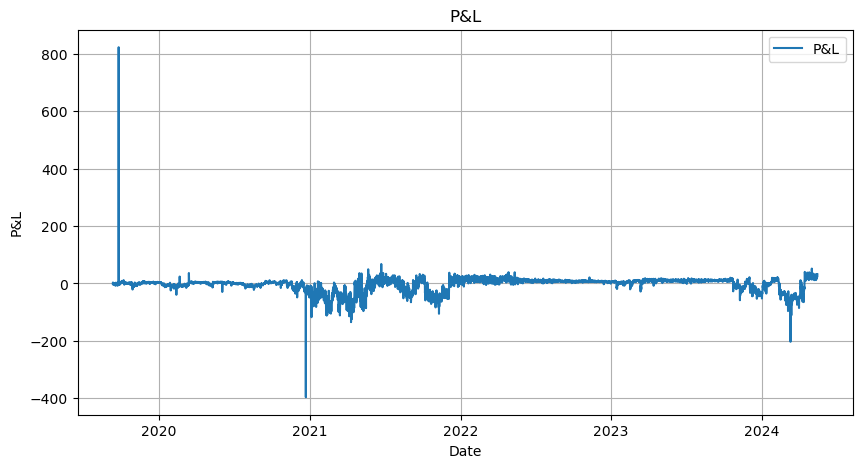

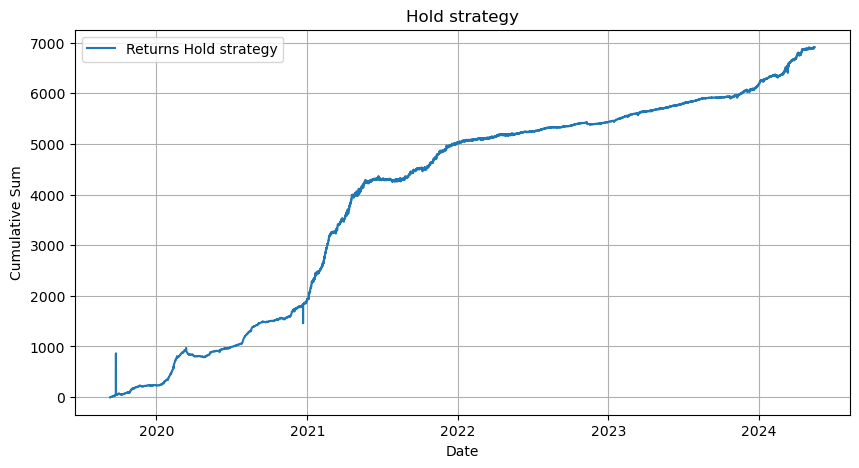

In [125]:

plt.figure(figsize=(10, 5))  # Set the figure size as desired
plt.plot(data2.index, data2['PandL'], label='P&L')
plt.title('P&L')  # Title of the plot
plt.ylabel('P&L')
plt.xlabel('Date')
plt.grid(True)  # Add gridlines for better readability
plt.legend()  # Add a legend if necessary
plt.show()  # Display the plot


plt.figure(figsize=(10, 5))  # Set the figure size as desired
plt.plot(data2.index, data2['hold_strat'], label='Returns Hold strategy')
plt.title('Hold strategy')  # Title of the plot
plt.ylabel('Cumulative Sum')
plt.xlabel('Date')
plt.grid(True)  # Add gridlines for better readability
plt.legend()  # Add a legend if necessary
plt.show()  # Display the plot

In [126]:
print("Without strategies (hold only), the cumulative sum of the funding rate returns would be: ", data2['hold_strat'].iloc[-1].round(4))

Without strategies (hold only), the cumulative sum of the funding rate returns would be:  6908.6963


In [127]:
data2.describe()

,Open BTCUSDT_SPOT,Open BTCUSDT_PERP,fundingRate,markPrice,cumulative funding rate,hold_strat,PandL
count,5133.000000,5133.000000,5133.000000,593.000000,5133.000000,5133.000000,5133.000000
mean,29737.667989,29739.370384,0.000134,51587.244621,0.399144,3979.992205,-3.658253
std,17157.391798,17166.655542,0.000244,12204.929161,0.211888,2118.472889,26.047711
min,4789.990000,4762.280000,-0.003000,34149.463652,0.000100,-3.000000,-396.399202
25%,15579.930000,15590.950000,0.000043,41993.000000,0.157246,1564.521159,-8.506322
50%,27546.620000,27533.700000,0.000100,46114.000000,0.504869,5048.994958,3.660401
75%,42391.510000,42410.400000,0.000100,63883.100000,0.560865,5601.320913,9.357027
max,73224.000000,73280.700000,0.003000,73280.700000,0.689048,6908.696313,823.137785


### Threshold strategy

In [187]:
# Threshold list, where if we go above we take/keep position and if we go/stay under we close position
thresholds = [-0.0005, -0.0004, -0.0003, -0.0002, -0.0001, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]

In [188]:
data4 = data2.copy()
data4.drop(columns = ['hold_strat', 'PandL'], inplace=True)

In [189]:
data4

,Open BTCUSDT_SPOT,Open BTCUSDT_PERP,fundingRate,markPrice,cumulative funding rate
Open Time,,,,,
2019-09-10 08:00:00,10272.64,10271.93,0.000100,NaN,0.000100
2019-09-10 16:00:00,10176.26,10172.13,0.000100,NaN,0.000200
2019-09-11 00:00:00,10098.19,10094.27,0.000100,NaN,0.000300
2019-09-11 08:00:00,10066.38,10068.41,0.000100,NaN,0.000400
2019-09-11 16:00:00,9990.57,9992.18,0.000100,NaN,0.000500
...,...,...,...,...,...
2024-05-14 00:00:00,62940.09,62912.20,0.000099,62917.600000,0.688804
2024-05-14 08:00:00,62035.39,62002.00,0.000100,62003.151865,0.688904
2024-05-14 16:00:00,61787.60,61750.00,0.000044,61749.900000,0.688948


In [190]:
# Initialize variables
result = []
size_final_f = []
size_final_s = []
position_open = True
PandL = []
X = 10000  # Initial capital
fees_spot = 0.0001
fees_future = 0.0001
last_open_index = 0
last_close_index = 0

# Initial fraction of BTCUSDT held as perp and spot
fract_perp = (X / data2['Open BTCUSDT_PERP'][0])
fract_spot = (X / data2['Open BTCUSDT_SPOT'][0])

# Compute initial fees from the first position and substract later to the first result
initial_fees = -(X * fees_future + X * fees_spot)


# Iterate through the data
for i in range(len(data4)):

    if position_open:

        if data4['fundingRate'].iloc[i] < 0 and abs(data4['fundingRate'].iloc[i] * fract_perp) > 0.0001:
            # Close the position
            position_open = False
            # Compute the fees for closing the position
            result.append(-(X * fees_future + X * fees_spot))
            # Compute the P&L for closing the position
            PandL.append((fract_perp * (data4['Open BTCUSDT_PERP'].iloc[last_open_index] - data4['Open BTCUSDT_PERP'].iloc[i])) +
                         (fract_spot * (data4['Open BTCUSDT_SPOT'].iloc[last_open_index] - data4['Open BTCUSDT_SPOT'].iloc[i])))
            X += ((PandL[-1] + sum(result[last_open_index:i]))/2)
            size_final_f.append(0)
            size_final_s.append(0)
            print('Position closed at index:', i)

        else:
            # Keep the position open
            position_open = True
            result.append(X * data4['fundingRate'].iloc[i])
            PandL.append((fract_perp * (data4['Open BTCUSDT_PERP'].iloc[last_open_index] - data4['Open BTCUSDT_PERP'].iloc[i])) +
                         (fract_spot * (data4['Open BTCUSDT_SPOT'].iloc[last_open_index] - data4['Open BTCUSDT_SPOT'].iloc[i])))
            size_final_f.append(fract_perp * data4['Open BTCUSDT_PERP'].iloc[i])
            size_final_s.append(fract_spot * data4['Open BTCUSDT_SPOT'].iloc[i])

    else: # If position is closed

        # Check if condition still holds
        if data4['fundingRate'].iloc[i] < 0 and abs(data4['fundingRate'].iloc[i] * fract_perp) > 0.0001:
            # Keep position closed  
            position_open = False
            result.append(0)
            PandL.append(0)
            size_final_f.append(0)
            size_final_s.append(0)

        else:
            # Reopen position 
            position_open = True 
            last_open_index = i
            fract_perp = (X / data4['Open BTCUSDT_PERP'].iloc[i])
            fract_spot = (X / data4['Open BTCUSDT_SPOT'].iloc[i])
            size_final_f.append(fract_perp * data4['Open BTCUSDT_PERP'].iloc[i])
            size_final_s.append(fract_spot * data4['Open BTCUSDT_SPOT'].iloc[i])
            PandL.append((fract_perp * (data4['Open BTCUSDT_PERP'].iloc[i] - data4['Open BTCUSDT_PERP'].iloc[i])) +
                         (fract_spot * (data4['Open BTCUSDT_SPOT'].iloc[i] - data4['Open BTCUSDT_SPOT'].iloc[i])))
            result.append((X * data4['fundingRate'].iloc[i]) - (X * fees_future + X * fees_spot))
            print('Position reopened at index:', i)

result[0] += initial_fees

# Compute the cumulative sum
cumulative_sum = list(itertools.accumulate(result))

Position closed at index: 67
Position reopened at index: 69
Position closed at index: 73
Position reopened at index: 76
Position closed at index: 77
Position reopened at index: 78
Position closed at index: 81
Position reopened at index: 83
Position closed at index: 136
Position reopened at index: 137
Position closed at index: 191
Position reopened at index: 192
Position closed at index: 220
Position reopened at index: 225
Position closed at index: 229
Position reopened at index: 235
Position closed at index: 256
Position reopened at index: 257
Position closed at index: 258
Position reopened at index: 259
Position closed at index: 277
Position reopened at index: 278
Position closed at index: 280
Position reopened at index: 285
Position closed at index: 290
Position reopened at index: 292
Position closed at index: 294
Position reopened at index: 295
Position closed at index: 296
Position reopened at index: 299
Position closed at index: 324
Position reopened at index: 327
Position closed 

In [191]:
size_final_s_multiplied = [i * fees_spot for i in size_final_s]
size_final_f_multiplied = [i * fees_future for i in size_final_f]

In [192]:
returns = []
for i in range(len(cumulative_sum)):
    result = cumulative_sum[i] + PandL[i] - size_final_s_multiplied[i] - size_final_f_multiplied[i]
    returns.append(result)


data4['strat_returns'] = returns
data4['PandL'] = PandL


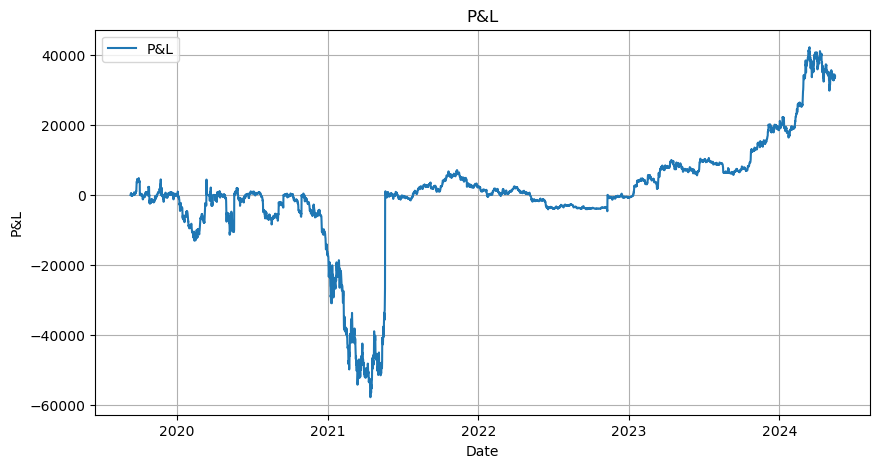

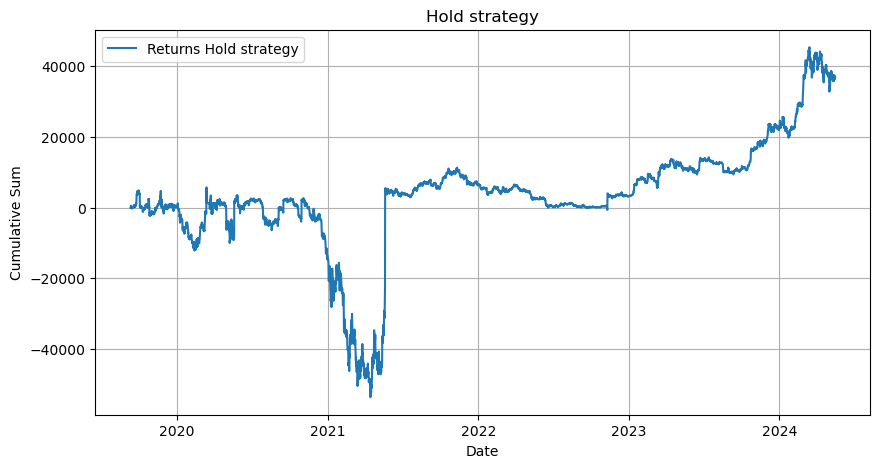

In [193]:

plt.figure(figsize=(10, 5))  # Set the figure size as desired
plt.plot(data4.index, data4['PandL'], label='P&L')
plt.title('P&L')  # Title of the plot
plt.ylabel('P&L')
plt.xlabel('Date')
plt.grid(True)  # Add gridlines for better readability
plt.legend()  # Add a legend if necessary
plt.show()  # Display the plot


plt.figure(figsize=(10, 5))  # Set the figure size as desired
plt.plot(data4.index, data4['strat_returns'], label='Returns Hold strategy')
plt.title('Hold strategy')  # Title of the plot
plt.ylabel('Cumulative Sum')
plt.xlabel('Date')
plt.grid(True)  # Add gridlines for better readability
plt.legend()  # Add a legend if necessary
plt.show()  # Display the plot